<a href="https://colab.research.google.com/github/Fahridanaa/PCVK_Ganjil_2024/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODUL 9 - Morfologi

> Nama: Fahridana Ahmad Rayyansyah
>
> Kelas: TI-3B
>
> Absem: 10
---

###  import folder yang ada di Drive

In [139]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import Library

In [140]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

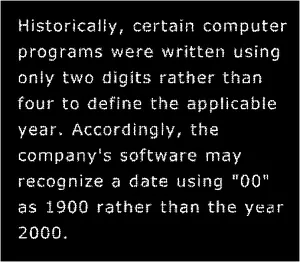

In [141]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/morphology.png', 0)
cv2_imshow(img)

SE = np.array([[0, 1, 0],
               [1, 1, 1],
               [0, 1, 0]], dtype=np.uint8)

###  fungsi dilasi

**Manual**

In [142]:
def dilation(image, struct_element):
    # Get dimensions of the image and structuring element
    img_h, img_w = image.shape
    se_h, se_w = struct_element.shape
    pad_h, pad_w = se_h // 2, se_w // 2

    # Create a padded version of the image to apply dilation at borders
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    # Prepare the output image
    dilated_image = np.zeros_like(image)

    # Perform dilation
    for i in range(pad_h, img_h + pad_h):
        for j in range(pad_w, img_w + pad_w):
            # Extract the region of interest (ROI)
            roi = padded_image[i - pad_h:i + pad_h + 1, j - pad_w:j + pad_w + 1]

            # Apply dilation (max value where structuring element is 1)
            dilated_image[i - pad_h, j - pad_w] = np.max(roi[struct_element == 1])

    return dilated_image

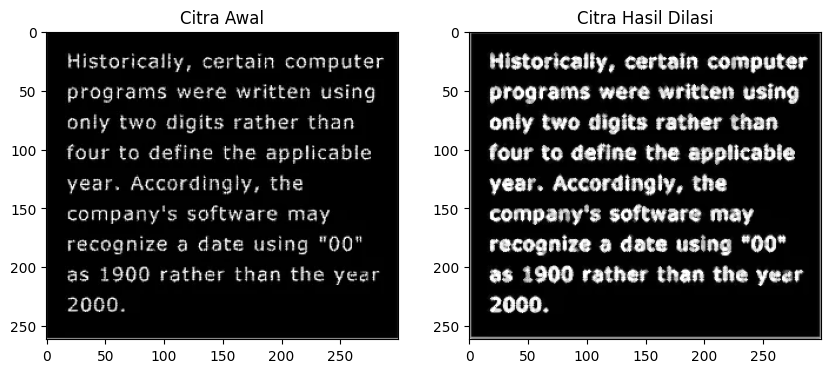

In [143]:
dilated_img = dilation(img, SE)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Citra Awal")
plt.imshow(img, cmap='gray')

plt.subplot(1,2,2)
plt.title("Citra Hasil Dilasi")
plt.imshow(dilated_img, cmap='gray')

plt.show()

**Menggunakan Library OpenCV**

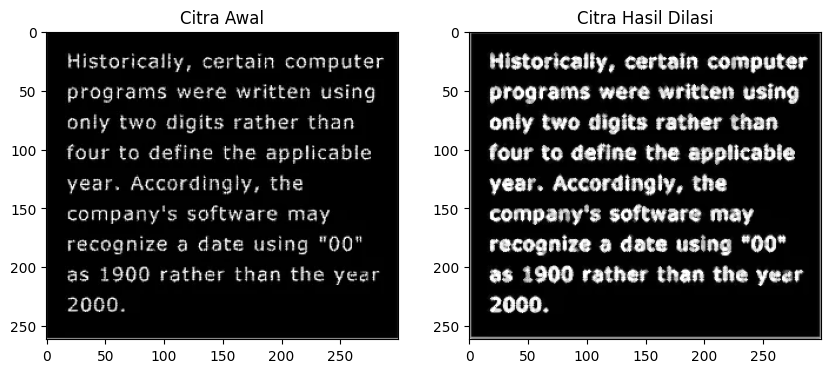

In [144]:
dilated_img_cv = cv.dilate(img, SE, iterations=1)


plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Citra Awal")
plt.imshow(img, cmap='gray')

plt.subplot(1,2,2)
plt.title("Citra Hasil Dilasi")
plt.imshow(dilated_img_cv, cmap='gray')

plt.show()


### fungsi erosi

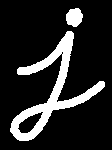

In [145]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/j.png', 0)
cv2_imshow(img)

**Manual**

In [146]:
def erosi(image, kernel):
    m, n = image.shape
    km, kn = kernel.shape
    pad = km // 2
    eroded = np.zeros((m, n), dtype=np.uint8)

    padded_image = np.pad(image, pad, mode='constant', constant_values=255)

    for i in range(m):
        for j in range(n):
            window = padded_image[i:i+km, j:j+kn]
            eroded[i, j] = np.min(window[kernel == 1])

    return eroded

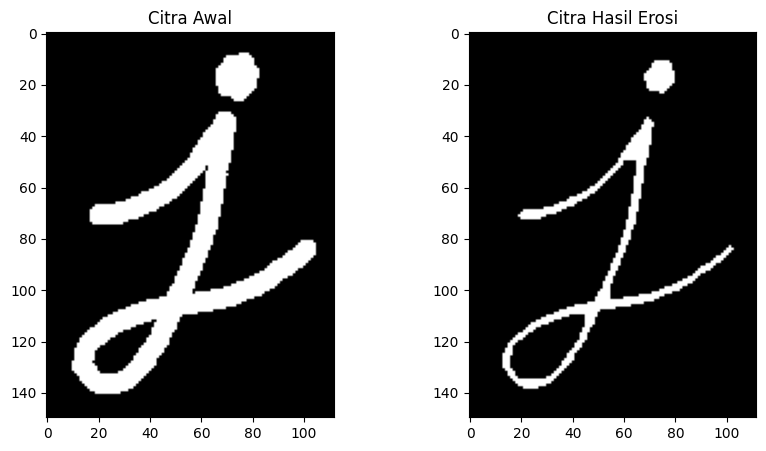

In [147]:
SE_square = np.ones((5, 5), dtype=np.uint8)

eroded_img = erosi(img, SE_square)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Citra Awal")
plt.imshow(img, cmap='gray')

plt.subplot(1,2,2)
plt.title("Citra Hasil Erosi")
plt.imshow(eroded_img, cmap='gray')

plt.show()

**Menggunakan OpenCV**

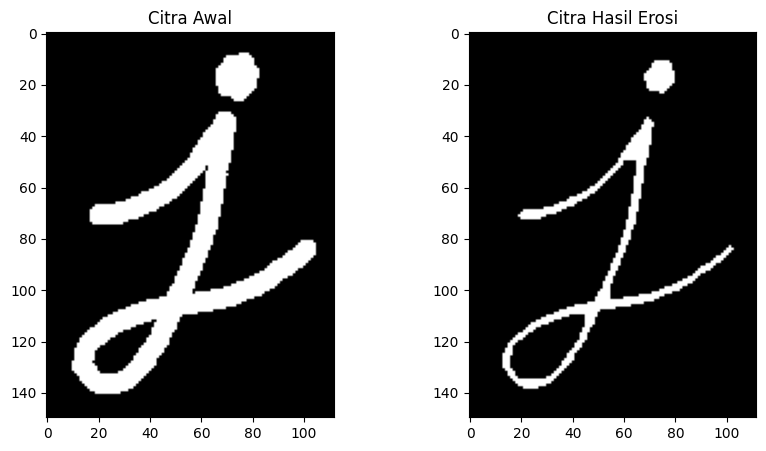

In [148]:
SE_square = np.ones((5, 5), dtype=np.uint8)
eroded_img_cv = cv.erode(img, SE_square, iterations=1)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Citra Awal")
plt.imshow(img, cmap='gray')

plt.subplot(1,2,2)
plt.title("Citra Hasil Erosi")
plt.imshow(eroded_img_cv, cmap='gray')

plt.show()


###  operasi opening dengan Structuring Element

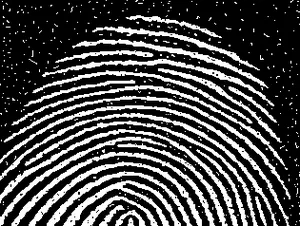

In [149]:
# Membaca gambar fingerprint
image = cv.imread('/content/drive/MyDrive/PCVK/Images/fingerprint.png')
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
cv2_imshow(image)

In [150]:
def opening(image, kernel):
  eroded = erosi(image, kernel)
  opened_image = dilation(eroded, kernel)
  return opened_image

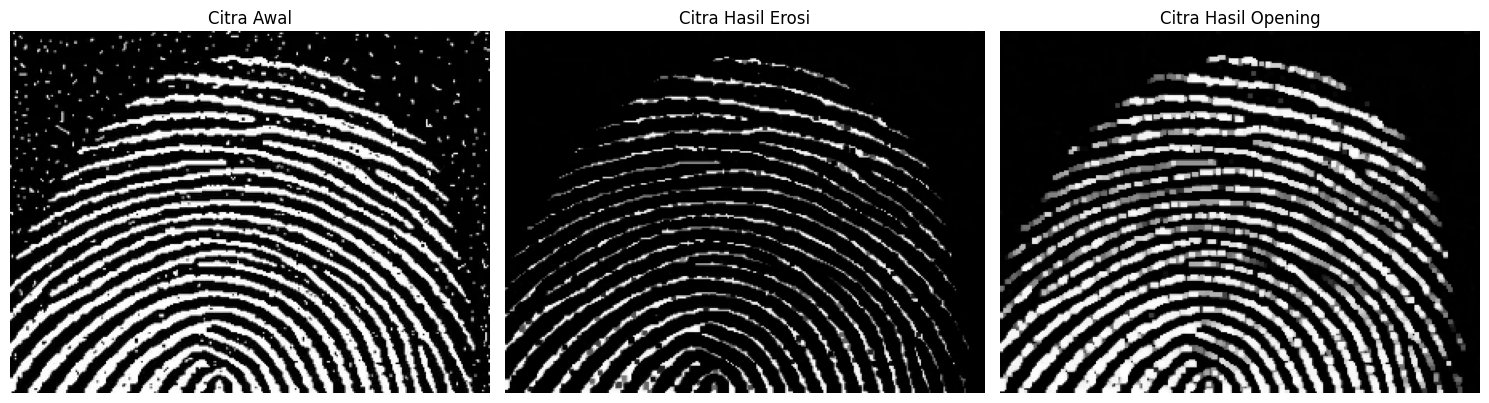

In [151]:
kernel = np.ones((3, 3), np.uint8)
opened_image = opening(image, kernel)

# Tampilkan hasil
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(132)
plt.imshow(erosi(image, kernel), cmap='gray')
plt.title('Citra Hasil Erosi')
plt.axis('off')

plt.subplot(133)
plt.imshow(opened_image, cmap='gray')
plt.title('Citra Hasil Opening')
plt.axis('off')

plt.tight_layout()
plt.show()

### closing dengan Structuring Element

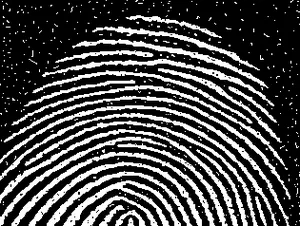

In [152]:
# Membaca gambar fingerprint
image = cv.imread('/content/drive/MyDrive/PCVK/Images/fingerprint.png')
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
cv2_imshow(image)

In [153]:
def closing(image, kernel):
    dilated = dilation(image, kernel)
    closed = erosi(dilated, kernel)
    return closed

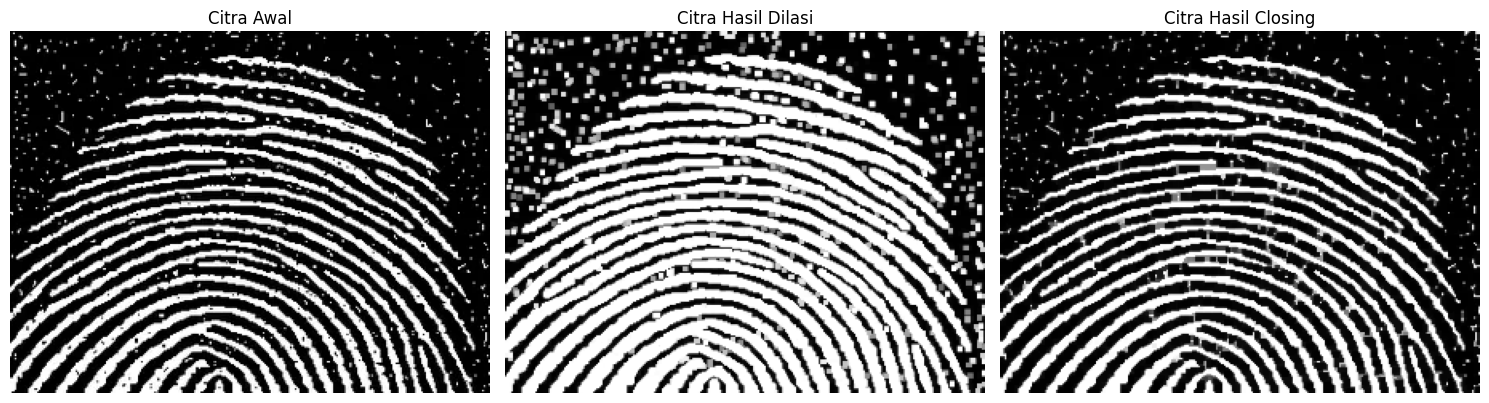

In [154]:
# Membuat structuring element berbentuk kotak 3x3
kernel = np.ones((3, 3), dtype=np.uint8)

# Aplikasikan closing
closed_image = closing(image, kernel)

# Tampilkan hasil
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(132)
plt.imshow(dilation(image, kernel), cmap='gray')
plt.title('Citra Hasil Dilasi')
plt.axis('off')

plt.subplot(133)
plt.imshow(closed_image, cmap='gray')
plt.title('Citra Hasil Closing')
plt.axis('off')

plt.tight_layout()
plt.show()

### operasi dilasi dengan Structuring Element berbentuk Cross 3 x 3  dan 5 x 5

In [155]:
def create_cross_se(size):
    se = np.zeros((size, size), dtype=np.uint8)
    se[size//2, :] = 1
    se[:, size//2] = 1
    return se

In [156]:
image = cv.imread('/content/drive/MyDrive/PCVK/Images/j.png', cv.IMREAD_GRAYSCALE)

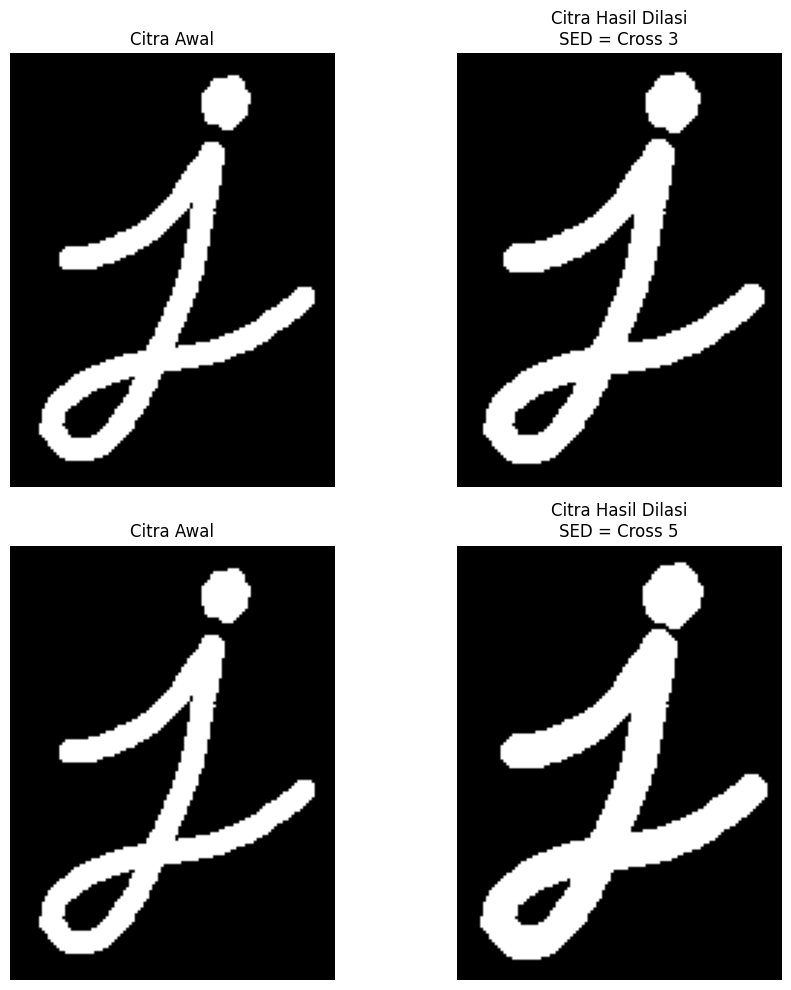

In [157]:
# Buat Structuring Element Cross 3x3 dan 5x5
se_cross_3 = create_cross_se(3)
se_cross_5 = create_cross_se(5)

# Aplikasikan dilasi
dilated_3 = cv.dilate(image, se_cross_3, iterations=1)
dilated_5 = cv.dilate(image, se_cross_5, iterations=1)

# Tampilkan hasil
plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(222)
plt.imshow(dilated_3, cmap='gray')
plt.title('Citra Hasil Dilasi\nSED = Cross 3')
plt.axis('off')

plt.subplot(223)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(224)
plt.imshow(dilated_5, cmap='gray')
plt.title('Citra Hasil Dilasi\nSED = Cross 5')
plt.axis('off')

plt.tight_layout()
plt.show()

### operasi dilasi dengan Structuring Element berbentuk Circular 3 x 3  dan 5 x 5

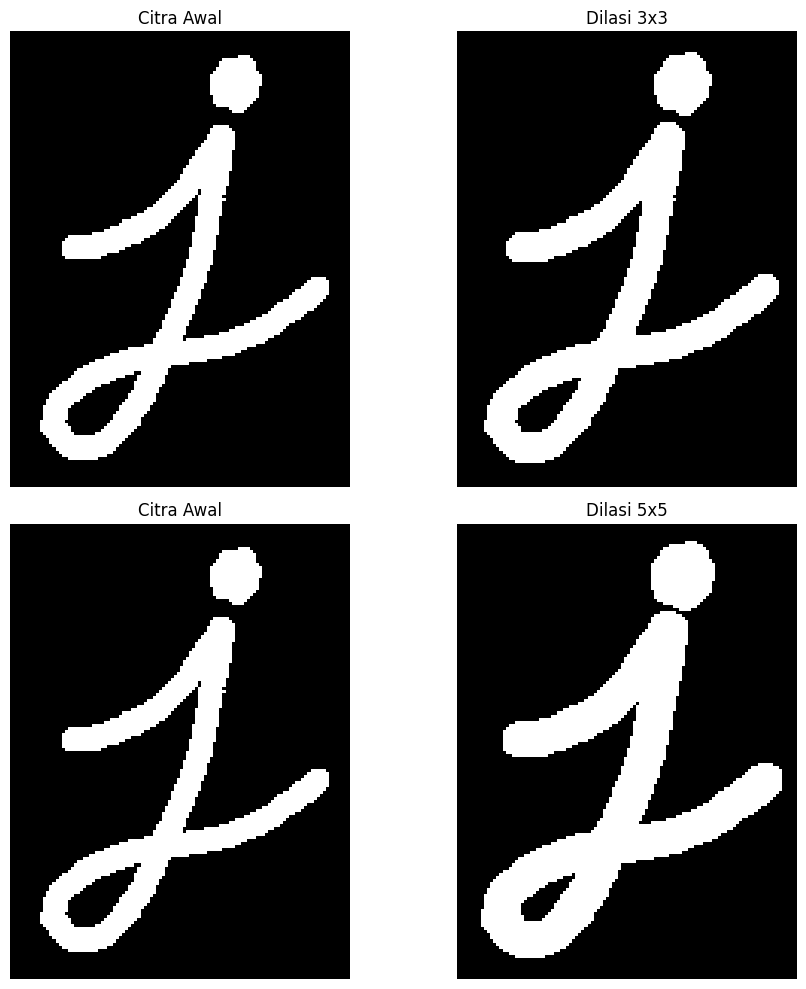

In [158]:
# Create circular structuring elements for dilation
kernel_3x3 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (3, 3))
kernel_5x5 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))

# Apply dilation with 3x3 kernel
dilated_3x3 = cv.dilate(image, kernel_3x3, iterations=1)

# Apply dilation with 5x5 kernel
dilated_5x5 = cv.dilate(image, kernel_5x5, iterations=1)

# Plotting the original and dilated images
plt.figure(figsize=(10, 10))

# Row 1: Original image and dilated with 3x3 kernel
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(dilated_3x3, cmap='gray')
plt.title('Dilasi 3x3')
plt.axis('off')

# Row 2: Original image and dilated with 5x5 kernel
plt.subplot(2, 2, 3)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(dilated_5x5, cmap='gray')
plt.title('Dilasi 5x5')
plt.axis('off')

# Show the plot
plt.tight_layout()
plt.show()

### operasi erosi dengan Structuring Element berbentuk Rectangle 3 x 5  dan 5 x 7

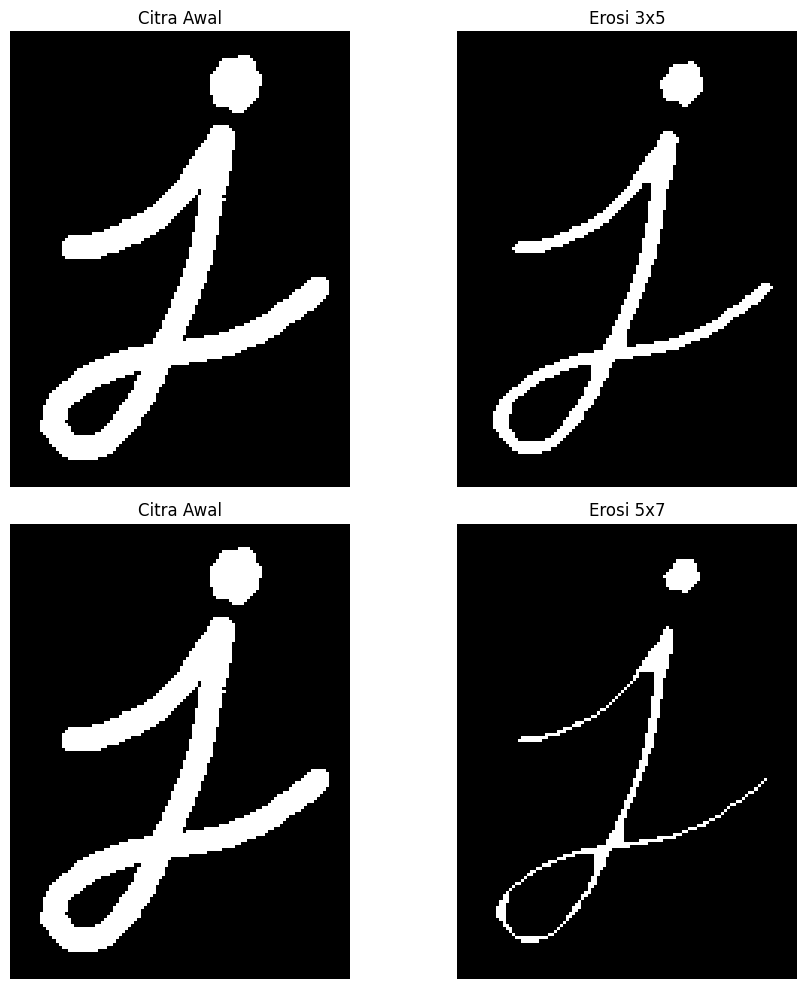

In [159]:
# Create rectangular structuring elements for erosion
kernel_3x5 = cv.getStructuringElement(cv.MORPH_RECT, (3, 5))
kernel_5x7 = cv.getStructuringElement(cv.MORPH_RECT, (5, 7))

# Apply erosion with 3x5 kernel
eroded_3x5 = cv.erode(image, kernel_3x5, iterations=1)

# Apply erosion with 5x7 kernel
eroded_5x7 = cv.erode(image, kernel_5x7, iterations=1)

# Plotting the original and eroded images
plt.figure(figsize=(10, 10))

# Row 1: Original image and eroded with 3x5 kernel
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(eroded_3x5, cmap='gray')
plt.title('Erosi 3x5')
plt.axis('off')

# Row 2: Original image and eroded with 5x7 kernel
plt.subplot(2, 2, 3)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(eroded_5x7, cmap='gray')
plt.title('Erosi 5x7')
plt.axis('off')

# Show the plot
plt.tight_layout()
plt.show()

### operasi erosi dengan Structuring Element berbentuk Line Vertikal 3 dan 5

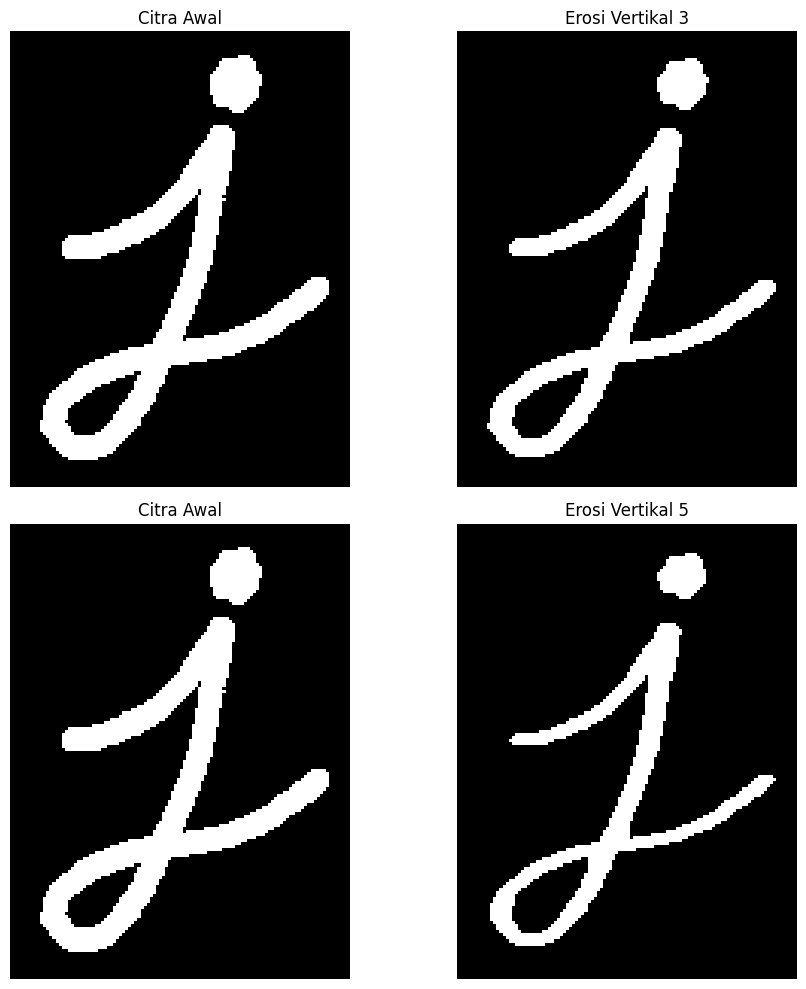

In [160]:
# Create vertical line structuring elements for erosion
kernel_vertical_3 = cv.getStructuringElement(cv.MORPH_RECT, (1, 3))  # Vertical line of height 3
kernel_vertical_5 = cv.getStructuringElement(cv.MORPH_RECT, (1, 5))  # Vertical line of height 5

# Apply erosion with 3-pixel vertical kernel
eroded_vertical_3 = cv.erode(image, kernel_vertical_3, iterations=1)

# Apply erosion with 5-pixel vertical kernel
eroded_vertical_5 = cv.erode(image, kernel_vertical_5, iterations=1)

# Plotting the original and eroded images
plt.figure(figsize=(10, 10))

# Row 1: Original image and eroded with vertical kernel of height 3
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(eroded_vertical_3, cmap='gray')
plt.title('Erosi Vertikal 3')
plt.axis('off')

# Row 2: Original image and eroded with vertical kernel of height 5
plt.subplot(2, 2, 3)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(eroded_vertical_5, cmap='gray')
plt.title('Erosi Vertikal 5')
plt.axis('off')

# Show the plot
plt.tight_layout()
plt.show()